<a href="https://colab.research.google.com/github/KevinrealG/Series_de_tiempo/blob/main/01_Time_Series_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Series de Tiempo

In [1]:
import numpy as np
import pandas as pd
from time import time
from scipy.stats import spearmanr
from collections import OrderedDict

from scipy import stats
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pip3 install aeon


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 15.5 MB/s eta 0:00:00


In [4]:
import os
import aeon
from aeon.datasets import load_from_tsfile

In [5]:
# time series - statsmodels
from statsmodels.tsa.filters.hp_filter import hpfilter  # Hodrick Prescott filter for cyclic & trend separation
from statsmodels.tsa.seasonal import seasonal_decompose # Error Trend Seasonality decomposition

# holt winters
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # single exponential smoothing as in ewm of pandas
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [8]:
train_x, train_y = load_from_tsfile("/content/drive/MyDrive/Colab Notebooks/Time_Series/DodgerLoopDay_TRAIN.ts")
len(train_y)


78

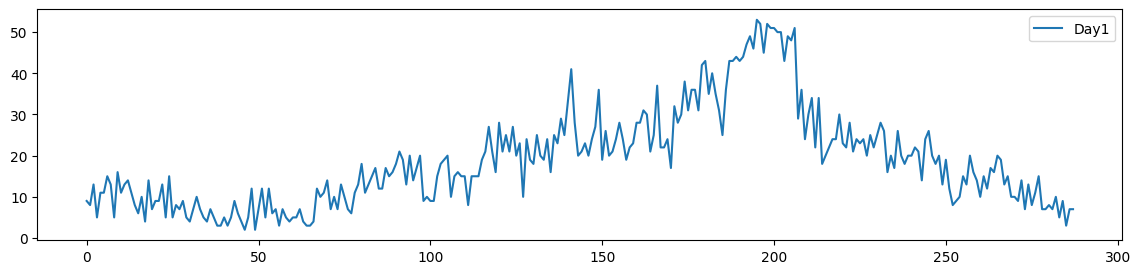

In [9]:
plt.figure(figsize=(14,3))
plt.plot(train_x[10][0],label="Day{}".format(train_y[10]))
plt.legend()
plt.show()